<a href="https://colab.research.google.com/github/Poojashrees3/Statistics-and-machine-learning/blob/Mybranch/exercise8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Understanding tree models**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import shap


data = pd.read_csv("epi_r.csv" )
data.head()


,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Checking missing values**

In [2]:
# Checking for missing values
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])
missing_data_columns= missing_data[missing_data > 0].index

calories      832
protein       839
fat           844
sodium        833
potato          1
             ... 
cookbooks       1
leftovers       1
snack           1
snack week      1
turkey          1
Length: 190, dtype: int64


**Data Cleaning**

In [3]:
# data cleaning done by imputation method
numeric_data = data[missing_data_columns].select_dtypes(include=np.number)
data[numeric_data.columns] = numeric_data.fillna(numeric_data.mean(), inplace=False)
print(data[numeric_data.columns])

         calories     protein         fat       sodium    potato  \
0      426.000000   30.000000    7.000000   559.000000  0.000000   
1      403.000000   18.000000   23.000000  1439.000000  0.000000   
2      165.000000    6.000000    7.000000   165.000000  1.000000   
3     3073.950179  141.726457  107.260778  3941.007759  0.000000   
4      547.000000   20.000000   32.000000   452.000000  0.000000   
...           ...         ...         ...          ...       ...   
4179   277.000000    4.000000   13.000000   198.000000  0.000000   
4180   192.000000    6.000000    8.000000   336.000000  0.000000   
4181   487.000000    8.000000   33.000000   161.000000  0.000000   
4182  3073.950179  141.726457  107.260778  3941.007759  0.000000   
4183   209.000000    9.000000    5.000000   364.000000  0.057853   

      potato salad   potluck   poultry  poultry sausage  pressure cooker  ...  \
0         0.000000  0.000000  0.000000         0.000000         0.000000  ...   
1         0.000000  0

**1. Tree Models**
**1.1 Decision tree Classifier **

In [6]:
X = data.drop('rating', axis=1)
y = data['rating']

#categorising data
y = pd.cut(y, bins=[0, 3, 4, 5], labels=['low', 'medium', 'high'])

# Converting non-numeric columns to numerical using one-hot encoding
X = pd.get_dummies(X)


# The y values might have NaNs, leading to the error
# Drop rows with NaNs in 'y' before splitting
X_train, X_test, y_train, y_test = train_test_split(X[~y.isna()], y[~y.isna()], test_size=0.2, random_state=42)


# Initialize and train a Decision Tree Classifier
tree_classifier = DecisionTreeClassifier(random_state=42) # You can tune hyperparameters here
tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_classifier.predict(X_test)

#evaluation metrics

print("Decision Tree Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average='weighted'))
print("Recall:", recall_score(y_test, y_pred,average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred,average='weighted'))


Decision Tree Classifier Results
Accuracy: 0.5359477124183006
Precision: 0.5268772184637338
Recall: 0.5359477124183006
F1 Score: 0.5302696587120447


**1.2 Random Forest Classifier**

In [7]:
# Initialize and train a Random forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)  # Initialize
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

#evaluation metrics

print("Random Forest Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average='weighted'))
print("Recall:", recall_score(y_test, y_pred,average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred,average='weighted'))

Random Forest Classifier Results
Accuracy: 0.6222222222222222
Precision: 0.6166344181856516
Recall: 0.6222222222222222
F1 Score: 0.5449869661776191


**1.3 Gradient Boosting Classifier**

In [4]:

gb_classifier = GradientBoostingClassifier(n_estimators=100,random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#evaluation metrics
print("Gradient Boosting Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average='weighted'))
print("Recall:", recall_score(y_test, y_pred,average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.5895424836601307
Gradient Boosting Classifier Results
Accuracy: 0.5895424836601307
Precision: 0.5075834417998095
Recall: 0.5895424836601307
F1 Score: 0.5010664718627922


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**2.KNN model with diff k**

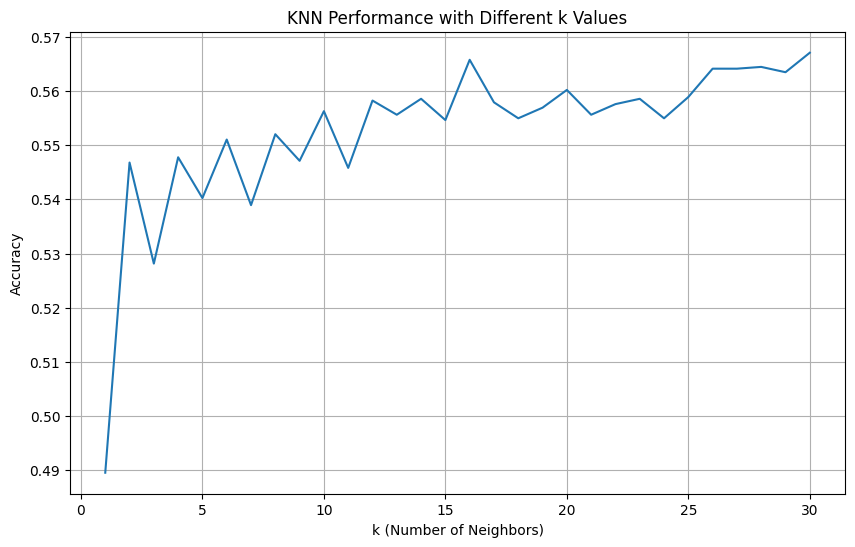

Optimal k value: 30
Accuracy with optimal k (30): 0.5895424836601307


In [8]:
from sklearn.neighbors import KNeighborsClassifier
X = data.drop('rating', axis=1)
y = data['rating']

#categorising data
y = pd.cut(y, bins=[0, 3, 4, 5], labels=['low', 'medium', 'high'])

# Converting non-numeric columns to numerical using one-hot encoding
X = pd.get_dummies(X)


# The y values might have NaNs, leading to the error
# Drop rows with NaNs in 'y' before splitting
X_train, X_test, y_train, y_test = train_test_split(X[~y.isna()], y[~y.isna()], test_size=0.2, random_state=42)

# Find optimal k
k_values = range(1, 31)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree', leaf_size=30)
    scores = cross_val_score(knn, X_train, y_train, cv=5) # 5-fold cross-validation
    accuracy_scores.append(scores.mean())

# Plot the performance
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores)
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Performance with Different k Values")
plt.grid(True)
plt.show()

# Find the optimal k
optimal_k = k_values[np.argmax(accuracy_scores)]
print(f"Optimal k value: {optimal_k}")

# Train and evaluate the model with the optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred = knn_optimal.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy with optimal k ({optimal_k}): {accuracy}")
knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
